
K-Means Customer Segmentation Analysis


In [4]:
#1 Importing the librariesimport numpy as np
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

1. อ่านไฟล์

In [7]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


2. แสดงผล 10 บรรทัดแรก

In [8]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


3. หาค่าสถิติพื้นฐาน

4. ดูการแจกแจง โดยแสดงกราฟแท่งของลูกค้าแยกตามเพศ มีตัวอย่างคำสั่งในการ plot หลายรูปแบบ

5. สร้าง histogram ของอายุ แบ่งเป็น 10 bin

6.ทำ scatter plot ของข้อมูล Age, Income 

7.พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering

In [27]:
select = data[['Age','Annual Income (k$)']]
select

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17
6,35,18
7,23,18
8,64,19
9,30,19


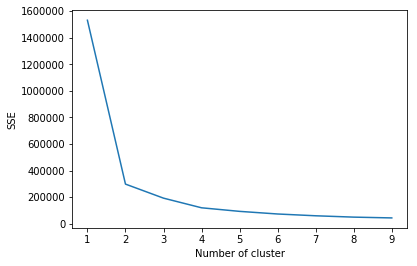

In [28]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
#data['Gender'] = number.fit_transform(data['Gender'])

k_means = KMeans(n_clusters=4)
k_means.fit(select)
cluster_pred = k_means.fit_predict(select)



sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(select)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

8. ได้ค่า k= 4 ในการจัดกลุ่มโดยวิธี K-Means

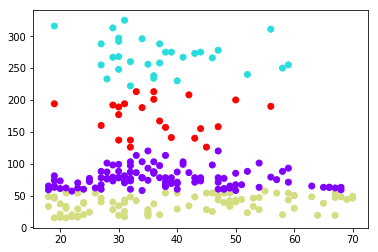

In [31]:
k_means = KMeans(n_clusters=4)
k_means.fit(select)
cluster_scale_pred = k_means.fit_predict(select)



plt.scatter(select['Age'], select['Annual Income (k$)'], c=cluster_scale_pred, cmap='rainbow', marker="o")


ข้อ 9 ทำ scatter plot ที่แสดง centroid

[[ 37.93693694  77.97297297]
 [ 37.33333333 270.9       ]
 [ 36.13636364 178.77272727]
 [ 40.1954023   36.5862069 ]]


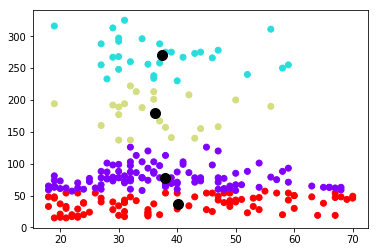

In [32]:
k_means = KMeans(n_clusters=4)
k_means.fit(select)
cluster_scale_pred = k_means.fit_predict(select)



plt.scatter(select['Age'], select['Annual Income (k$)'], c=cluster_scale_pred, cmap='rainbow', marker="o")
centers = k_means.cluster_centers_
print(centers) #พิมพ์จุดกลาง
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)